In [1]:
#1. Collect data and 2. Load and preprocess

import sys
import pandas as pd
import numpy as np


In [2]:
path = sys.path[0]
data = "/redfin_2020.csv" #this data is previous sale records of single homes in palo alto and adjacent areas. the year ranges from 2017-2019 

df_raw = pd.read_csv(path+data)

In [3]:
df_raw.info() #look at the data highlevel (info() is useful because it also includes df_raw.shape, df_raw.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 25 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   SALE TYPE                                                                                    184 non-null    object 
 1   SOLD YEAR                                                                                    107 non-null    float64
 2   CITY                                                                                         184 non-null    object 
 3   STATE OR PROVINCE                                                                            184 non-null    object 
 4   ZIP OR POSTAL CODE                                                                           184 non-null    int64  
 5   PRICE                               

In [4]:
#take a peek at the dataframe
df_raw.head()

,SALE TYPE,SOLD YEAR,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,PAST SALE,2017.0,PALO ALTO,CA,94301,7200000,5.0,4.0,PALO ALTO,4358.0,...,Sold,NaN,NaN,https://www.redfin.com/CA/Palo-Alto/525-Center...,MLSListings,ML81652346,N,Y,37.456094,-122.143513
1,PAST SALE,2017.0,PALO ALTO,CA,94306,4490000,5.0,4.5,PALO ALTO,3486.0,...,Sold,NaN,NaN,https://www.redfin.com/CA/Palo-Alto/138-Park-A...,MLSListings,ML81670538,N,Y,37.429859,-122.150108
2,PAST SALE,2017.0,PALO ALTO,CA,94306,5000000,6.0,5.5,PALO ALTO,3408.0,...,Sold,NaN,NaN,https://www.redfin.com/CA/Palo-Alto/3452-Cowpe...,MLSListings,ML81673433,N,Y,37.423402,-122.120644
3,PAST SALE,2017.0,PALO ALTO,CA,94303,3800000,6.0,4.0,PALO ALTO,3645.0,...,Sold,NaN,NaN,https://www.redfin.com/CA/Palo-Alto/653-Wildwo...,MLSListings,ML81653995,N,Y,37.450088,-122.127432
4,PAST SALE,2017.0,PALO ALTO,CA,94306,2400000,5.0,5.5,PALO ALTO,3600.0,...,Sold,NaN,NaN,https://www.redfin.com/CA/Palo-Alto/4388-Silva...,MLSListings,ML81671064,N,Y,37.407704,-122.113811


In [10]:
#picking up only necessary values that's crititocal to price: beds, baths, square feet, lot size, year built, $/square feet, etc
#vals like location, zip code, state, property types, are excluded because the raw data was already filtered with certain conditions, and the values are all the same in that vals 

y_label = "PRICE"
necessary_vars = ["BEDS", "BATHS", "CITY", "PRICE", "SQUARE FEET", "LOT SIZE", "YEAR BUILT", "$/SQUARE FEET"]

df=df_raw[necessary_vars]
df.info() #shape(184, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BEDS           182 non-null    float64
 1   BATHS          182 non-null    float64
 2   CITY           184 non-null    object 
 3   PRICE          184 non-null    int64  
 4   SQUARE FEET    183 non-null    float64
 5   LOT SIZE       184 non-null    int64  
 6   YEAR BUILT     182 non-null    float64
 7   $/SQUARE FEET  183 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 11.6+ KB


In [11]:
#seems there are some rows with the missing values. let's take a look 

df[df.isnull().any(axis=1)]

,BEDS,BATHS,CITY,PRICE,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET
142,NaN,NaN,La Honda,800000,NaN,1751548,NaN,NaN
172,NaN,NaN,Palo Alto,2700000,2006.0,8676,NaN,1346.0


In [12]:
# will drop the two rows 
df = df.dropna().reset_index(drop=True)

In [13]:
df[df.isnull().any(axis=1)]

,BEDS,BATHS,CITY,PRICE,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET


In [14]:
df.info()  #shape (182, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BEDS           182 non-null    float64
 1   BATHS          182 non-null    float64
 2   CITY           182 non-null    object 
 3   PRICE          182 non-null    int64  
 4   SQUARE FEET    182 non-null    float64
 5   LOT SIZE       182 non-null    int64  
 6   YEAR BUILT     182 non-null    float64
 7   $/SQUARE FEET  182 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 11.5+ KB


In [15]:
# handle categorical values, in this case City.

df["CITY"].unique()

array(['PALO ALTO', 'LOS ALTOS HILLS', 'STANFORD', 'MENLO PARK',
       'EAST PALO ALTO', 'LOS ALTOS', 'PORTOLA VALLEY', 'Palo Alto',
       'Menlo Park', 'Los Altos Hills'], dtype=object)

In [16]:
# there's casing issue in this column. Need to unify, by making Palo Alto to PALO ALTO, etc.

df["CITY"] = df.loc[:, "CITY"].str.upper()

In [17]:
df["CITY"].unique() #the casing is handled now. 

array(['PALO ALTO', 'LOS ALTOS HILLS', 'STANFORD', 'MENLO PARK',
       'EAST PALO ALTO', 'LOS ALTOS', 'PORTOLA VALLEY'], dtype=object)

In [18]:
df["CITY"].nunique()

7

In [19]:
#for CITY column values, need to apply one-hot encoding
#I am going to label each of the cities into numeric value (label encoding), and then do the one-hot encoding.  

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [20]:
label_enc = LabelEncoder()
city_label = label_enc.fit_transform(df["CITY"])
city_label #looks like mostly 4, which is what I am focusing (city, palo alto)

array([4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 6, 4, 3, 3, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 2, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4,
       4, 4, 4, 4, 4, 4])

In [21]:
df["city_label"] = city_label
df

,BEDS,BATHS,CITY,PRICE,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,city_label
0,5.0,4.0,PALO ALTO,7200000,4358.0,14709,1931.0,1652.0,4
1,5.0,4.5,PALO ALTO,4490000,3486.0,7500,1940.0,1288.0,4
2,6.0,5.5,PALO ALTO,5000000,3408.0,9198,2017.0,1467.0,4
3,6.0,4.0,PALO ALTO,3800000,3645.0,10080,1956.0,1043.0,4
4,5.0,5.5,PALO ALTO,2400000,3600.0,9600,2020.0,667.0,4
...,...,...,...,...,...,...,...,...,...
177,5.0,4.0,PALO ALTO,4200000,3197.0,8903,2021.0,1314.0,4
178,4.0,3.0,PALO ALTO,5700000,3195.0,11332,1941.0,1784.0,4
179,5.0,3.0,PALO ALTO,5000000,3190.0,8678,1988.0,1567.0,4
180,3.0,3.0,PALO ALTO,6000000,3188.0,13113,1928.0,1882.0,4


In [22]:
# find out which city is labeled with what label (number)
for city in df["CITY"].unique():
    print("{}: {}".format(city, df[df['CITY'] == city].city_label.iloc[0]))


PALO ALTO: 4
LOS ALTOS HILLS: 2
STANFORD: 6
MENLO PARK: 3
EAST PALO ALTO: 0
LOS ALTOS: 1
PORTOLA VALLEY: 5


In [24]:
# exclude from PRICE from x features. drop the CITY, city_label, PRICE columns, no more needed
df_y=df[y_label]
df_y

0      7200000
1      4490000
2      5000000
3      3800000
4      2400000
        ...   
177    4200000
178    5700000
179    5000000
180    6000000
181    3280000
Name: PRICE, Length: 182, dtype: int64

In [25]:
df.drop(["city_label", "CITY", "PRICE"], axis=1, inplace=True)

In [26]:
#now one hot encoding part 

city_df = pd.DataFrame(OneHotEncoder(categories="auto").fit_transform(city_label.reshape(-1, 1)).toarray(), columns=["EPA", "LA", "LAH", "MP", "PA", "PV", "STAN"])
city_df.head()

,EPA,LA,LAH,MP,PA,PV,STAN
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
# before concating, find the shapes of the two data frame (original df, one-hot encoded df) and see the # rows are matching

print(df.shape)
print(city_df.shape) #their rows match

(182, 6)
(182, 7)


In [28]:
df = pd.concat([df, city_df], axis=1, verify_integrity=True)
df.head()

,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,EPA,LA,LAH,MP,PA,PV,STAN
0,5.0,4.0,4358.0,14709,1931.0,1652.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.0,4.5,3486.0,7500,1940.0,1288.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,6.0,5.5,3408.0,9198,2017.0,1467.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6.0,4.0,3645.0,10080,1956.0,1043.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5.0,5.5,3600.0,9600,2020.0,667.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
#3. try adding my own feature, bath-bed ratio. seems positive correlation 
df["BATH/BED RATIO"] = df["BATHS"]/df["BEDS"]
df.head()

,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,EPA,LA,LAH,MP,PA,PV,STAN,BATH/BED RATIO
0,5.0,4.0,4358.0,14709,1931.0,1652.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.800000
1,5.0,4.5,3486.0,7500,1940.0,1288.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.900000
2,6.0,5.5,3408.0,9198,2017.0,1467.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.916667
3,6.0,4.0,3645.0,10080,1956.0,1043.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667
4,5.0,5.5,3600.0,9600,2020.0,667.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.100000


In [30]:
df.info() #182, 14

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BEDS            182 non-null    float64
 1   BATHS           182 non-null    float64
 2   SQUARE FEET     182 non-null    float64
 3   LOT SIZE        182 non-null    int64  
 4   YEAR BUILT      182 non-null    float64
 5   $/SQUARE FEET   182 non-null    float64
 6   EPA             182 non-null    float64
 7   LA              182 non-null    float64
 8   LAH             182 non-null    float64
 9   MP              182 non-null    float64
 10  PA              182 non-null    float64
 11  PV              182 non-null    float64
 12  STAN            182 non-null    float64
 13  BATH/BED RATIO  182 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 20.0 KB


In [31]:
#4. split training and testing

from sklearn.model_selection import train_test_split

In [33]:
#check the features and label before continuing

print(df_y.shape)
print(df.shape) 

(182,)
(182, 14)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(df, df_y, test_size=0.2)

In [35]:
#check the split shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(145, 14)
(37, 14)
(145,)
(37,)


In [36]:
#5, 6. Fit the training set to the sk linear regression model

import sklearn.linear_model

reg = sklearn.linear_model.LinearRegression()
fit = reg.fit(X_train, y_train)

In [37]:
# check basic stats

fit.coef_ #how strong a relationship is between two variables, the categorical variables(multinomial variables) are not qualified for coefficients

array([ 5.31454701e+04, -5.39853769e+05,  1.90638204e+03, -4.53229673e+00,
        1.01960281e+04,  5.38264558e+03,  3.24482498e+06, -4.03419719e+05,
       -3.28113686e+05, -1.19416477e+06, -7.19904133e+05, -5.99222679e+05,
        0.00000000e+00,  1.50562113e+05])

In [38]:
fit.intercept_ 

-27045210.898157045

In [39]:
#7. Apply predict on testing 
df_pred = fit.predict(X_test)
df_pred

array([ 8298518.76576596,  9154872.7918533 ,  2955324.79987828,
       10110973.28159745,  4918875.57850214,  5095185.73151953,
        3911053.7629797 ,  7457549.38418023, 18178045.46852851,
        9286122.57144127,  6340688.64864206,  1827866.76249621,
       10336258.12391712,  1856072.41567828,   702701.63202494,
        5162875.22351691,  7518848.24002348, 10021129.62887828,
        2739441.26470211,  4436652.63816658,  7337059.20352124,
        2543304.87684299, 11763686.00722171,  4384331.46528463,
        6982321.4571313 ,  3034225.70556486,  5144914.0243738 ,
       13355982.65872914,  6570679.272405  ,  3943843.80116004,
       13571991.76305963,  4517950.82049902,  7045439.26732441,
        4200781.10139633,  2980016.38205053,  4095161.06173896,
       10799991.94048034])

In [40]:
#8. Find the stats on prediction - pearsonr and resisuals

import scipy.stats

scipy.stats.pearsonr(df_pred, y_test) #0.93 correlation, p-value is very low, meaning statistically significant

(0.9310001169106874, 6.872330488901666e-17)

<AxesSubplot:ylabel='PRICE'>

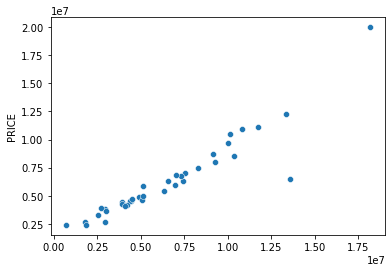

In [41]:
#9. Visualize resisuals

import seaborn

%matplotlib inline
seaborn.scatterplot(x = df_pred, y = y_test)

In [42]:
#10. Try the house I am considering to this model and see the prediction. This house has 4 bedrooms, 2.5 bathrooms, about 1800sq of living space, lot size of 6000 sq, located in palo alto. 
#BEDS	BATHS	SQUARE FEET	LOT SIZE	YEAR BUILT	$/SQUARE FEET	EPA	LA	LAH	MP	PA	PV	STAN	BATH/BED RATIO

house_candidate = np.array([4, 2.5, 1800, 6000, 1960, 1500, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.625]).reshape(1, 14)
house_candidate.shape

(1, 14)

In [43]:
est = fit.predict(house_candidate)
est

array([2654411.13492236])

## Conclusion:
### The predicted house price came out to be a little over 2.6 million. 
### We purchased this house at 2.8 million, meaning we paid appx $200,000 more than the estimation according to my model.

In [58]:
#In the scatterplot, there are 2 datapoints that seem outliers. What are they?

df.iloc[df_y.argmin()] 

BEDS                 7.000000
BATHS                6.000000
SQUARE FEET       3150.000000
LOT SIZE          6000.000000
YEAR BUILT        1952.000000
$/SQUARE FEET      295.000000
EPA                  1.000000
LA                   0.000000
LAH                  0.000000
MP                   0.000000
PA                   0.000000
PV                   0.000000
STAN                 0.000000
BATH/BED RATIO       0.857143
Name: 53, dtype: float64

In [59]:
df_raw.iloc[df_y.argmin()] #It seems this house was relatively cheap due to CITY, east palo alto. 6000 lot size with 7 bedrooms & 6 bathrooms looks a bit odd, too.

SALE TYPE                                                                                                                              PAST SALE
SOLD YEAR                                                                                                                                 2018.0
CITY                                                                                                                              EAST PALO ALTO
STATE OR PROVINCE                                                                                                                             CA
ZIP OR POSTAL CODE                                                                                                                         94303
PRICE                                                                                                                                     930000
BEDS                                                                                                                              

In [62]:
df_y.max() #39 million, outlier 

39988000

In [61]:
df_raw.iloc[df_y.argmax()]  #looks like the price is largely due to the massive lot size, almost 50000 sq. 

SALE TYPE                                                                                                                              PAST SALE
SOLD YEAR                                                                                                                                    NaN
CITY                                                                                                                                   Palo Alto
STATE OR PROVINCE                                                                                                                             CA
ZIP OR POSTAL CODE                                                                                                                         94301
PRICE                                                                                                                                   39988000
BEDS                                                                                                                              